<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:200%;
           font-family:Arial;letter-spacing:0.5px">

<p width = 20%, style="padding: 10px;
              color:white;">
Distributions: Part I
              
</p>
</div>

Data Science Cohort Live NYC Feb 2022
<p>Phase 2: Topic 12</p>
<br>
<br>

<div align = "right">
<img src="Images/flatiron-school-logo.png" align = "right" width="200"/>
</div>
    
    

#### Probability distribution

Representation of the frequencies of potential outcomes of experiment.

#### Example case:
    
What is probability is that a given student at Flatiron has:
- Age < 25.
- 25 <= Age < 30.
- 30 <= Age < 35.
- 35 <= Age < 40.
- Age >= 40

#### Sample vs population

<center><img src="Images/population_sample.png" width="500"/></center>

    


**Population**: whole group we're interested in. Population being the whole set of possible outcomes.

**Sample**: random subset picked over the population. 

#### One way to build probability distribution:

- Get ages of all students at Flatiron (population)
- Bin accordingly to build probability distribution.

We find:



Discrete example
(binned distribution of student ages ):

- $15\%$ are under the age of $25$
- $30\%$ are between $25$ & $30$
- $25\%$ are between $30$ & $35$
- $20\%$ are between $35$ & $40$
- $10\%$ are over the age of $40$

**Build probability distribution from population percentages**

#### Sampling

- Picking a person randomly: 

What is the probability that person is older than 40?

$$ P = 0.1 $$

#### Probability Mass Function (PMF)

Probability distribution over finite outcomes. Nothing fancy.

In [264]:
import pandas as pd
outcome_df = pd.DataFrame([('<25', 0.15),('25-30', 0.3,),('30-35', 0.2,),('35-40', .25,),('>40', .1,)], columns=['Age Range', 'PMF'])

Probability mass function in table form

In [265]:
outcome_df

Age Range   PMF
0       <25  0.15
1     25-30  0.30
2     30-35  0.20
3     35-40  0.25
4       >40  0.10

#### Plot PMF

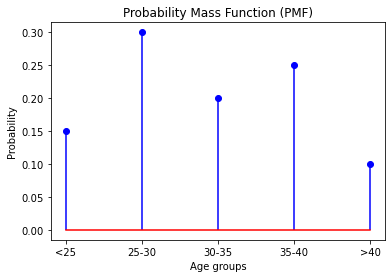

In [266]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import stem


plt.stem(outcome_df['Age Range'], outcome_df['PMF'], linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Age groups')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.show()

An actual use of using population data to build probability distributions:
- US Census data
- Reef base: Global coral reef database
- Large training sets: Ad-tech click rate data

#### Mathematical models of distribution

- In many cases: know what a population distribution _should_ be.
- Can model uncertainty: mathematically define a model governing statistics or population level data.



Example: number of calls per minute at a call center.

- Observe average rate of 3 calls/min.
- Know that calls are independent of each other.

Can show this situation modeled by Poisson distribution.

PMF of Poisson counting process:
$$ P(n|\lambda) = \frac {\lambda ^{n}e^{-\lambda }}{n!} $$

- $\lambda$ is observed average rate.
- Parameter of distribution: observed from data.

scipy.stats can really help us model/visualize this.
- poisson.pmf(n, lambda)

In [267]:
from scipy.stats import poisson

call_pmf =[(x, poisson.pmf(x, 3)) 
           for x in range(10)]

x,y = list(zip(*call_pmf))

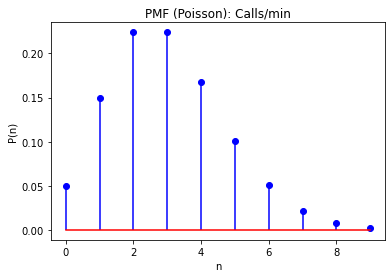

In [268]:
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson): Calls/min')
plt.show()

Sometime parameter determined from laws of physics, domain knowledge, etc.:

- Mean nuclear decay rate of Iodine-131 is 31.5 decay events/year.
- Decay events independent.

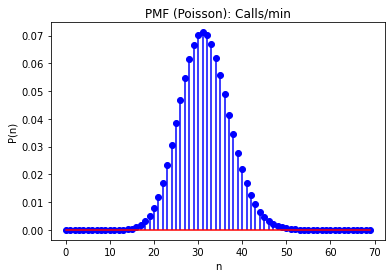

In [269]:
nuclear_pmf =[(x, poisson.pmf(x, 31.5)) for x in range(70)]
x,y = list(zip(*nuclear_pmf))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('PMF (Poisson): Calls/min')
plt.show()

#### Common types of distributions: Discrete 

- **Uniform Distribution**
    - Occurs when all possible outcomes are equally likely.
    - e.g. rolling a six-sided far die

- **Bernoulli Distribution**
    - Represents the probability of success for a certain experiment (binary outcome).
    - Did someone click on the ad banner or not?

$$ B(X| p) = p^X(1-p)^{1-X} $$

Yes: X = 1 <br>
No: X = 0 <br>
$p$: probability of banner clicked.

Probability of clicked:
$$ B(X = 1| p) = p $$ <br>

Probability of not clicked:
$$ B(X = 0| p) = 1 - p $$

Scipy stats can help us with sampling distribution/plotting PMF, etc

Probability is 4% of ad being clicked.

In [270]:
# import bernoulli
from scipy.stats import bernoulli

bernoulli_pmf = [(x, bernoulli.pmf(x, p = .04)) for x in [0,1]]
bernoulli_pmf

[(0, 0.96), (1, 0.04000000000000001)]

Let's random sample this distribution 100 times.

In [271]:
bernoulli.rvs(p = 0.04, size = 50)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

- **Binomial Distribution**
    - Represents the probability of observing a specific number of successes (Bernoulli trials) in a specific number of trials.
    

- success probability of single Bernoulli trial: $p$
- N trials
- Probability of k sucesses?

$$ Binomial(k | N, p) = \frac{N!}{(N-k)!k!}p^k(1-p)^{N-k} $$

-  Estimate number of ad clicks in 50 random samples of our user-site interactions.

In [272]:
from scipy.stats import binom
N = 50
p = 0.04 

pmf_binomial = [(x, binom.pmf(x, n = N, p = p)) 
                for x in range(10)]

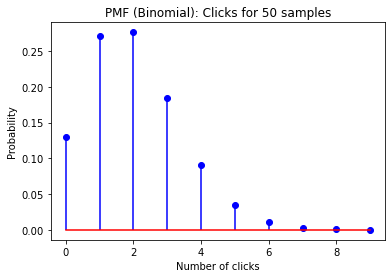

In [273]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Clicks for 50 samples')
plt.show()

Can sample this binomial distribution:

In [274]:

n = 50  # number of samples for user-site interaction trial
p = 0.04  # probability of success
size = 200  # number of trials

# Create a discrete distribution with the given parameter values
binomial = binom.rvs(n=n, p=p, size=size)

print(f'Number of ad clicks in each trial of 50 samples: \n {binomial} \n')

Number of ad clicks in each trial of 50 samples: 
 [0 2 0 3 3 3 1 0 1 0 6 3 5 2 5 1 1 1 4 2 5 2 2 3 0 0 1 1 2 1 2 3 6 2 3 1 2
 3 2 3 2 3 2 2 2 4 1 2 1 1 1 2 1 3 3 1 3 3 3 5 4 2 0 2 2 3 1 2 0 1 1 0 1 3
 2 2 2 2 0 1 0 0 0 2 0 7 1 2 1 0 1 4 0 1 3 2 0 2 2 1 5 2 1 2 0 6 0 2 4 3 1
 0 2 1 3 0 1 4 3 1 2 1 2 1 4 0 2 1 2 1 2 4 1 3 3 1 4 3 2 1 1 1 4 4 0 4 2 1
 0 2 1 0 1 4 1 2 4 3 4 5 3 2 1 0 1 1 2 3 1 4 2 2 1 4 4 0 0 1 3 0 2 2 3 1 2
 1 3 2 0 1 6 1 0 3 0 5 1 6 0 1] 



#### Common types of distributions: Continuous 

- **Continuous Uniform**
    - A continuous distribution that takes values within a specified range *a* to *b*, when each value within the range is equally likely.
    - e.g. time take an elevator arrive at your floor.

- **Normal (Gaussian)**
    - The bell curve. Governs many continuous variables.
    - Particularly: variables made up of many random subfactors.
    - height in a population.
    - average number of ad clicks in 50 random samples of user-site interactions.

- **Exponential**
    - Uses to model the time elapsed between events.
    - e.g. amount of time a postal clerk spends with a customer

#### PDF: Probability Density Function
- Continuous limit of the histogram.

**Probability density functions (PDF)** similar to PMFs but:

- continuous variable
- probability of **exactly** having a given value of continuous not defined. 
- probability of a result within a range of values. 

![](images/pdf_temp.png)

- PDFs give us probability density.
- Area under PDF in given range yields probability.  

<center><img src="Images/pdf_proba.gif" width="450"/></center>

#### Sampling and the PDF with the normal distribution

Mathematical form for pdf:
$$ N(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $$

- $\mu$ is mean.
- $\sigma$ is standard deviation.

With scipy.stats:

- norm.pdf(loc = mean, scale = std)

In [285]:
from scipy.stats import norm

In [286]:
# Moving mean around
mu_list = [-2,0,2]
sigma = 1

x = np.linspace(-7,7)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for mu in mu_list]

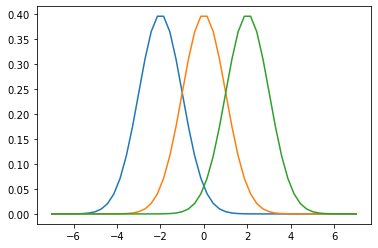

In [287]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

In [288]:
# mess with std/variance
mu = 0
sigma_list = [1,2,4]

x = np.linspace(-8,8)
y_list = [norm.pdf(x, loc = mu, scale = sigma)
          for sigma in sigma_list]

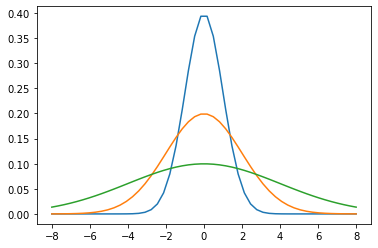

In [289]:
fig,ax = plt.subplots()
[ax.plot(x,y) for y in y_list]
plt.show()

The variance/std describes how closely the points gathered around the mean.  
- Low variance means tight and skinny, high variance short and wide.

#### Sampling from normal distribution

- rvs method:

In [290]:
# 20 random samples from normal with mean 0 and std 1.
norm_sample = norm.rvs(loc = 0, scale = 1, size = 100)
norm_sample

array([ 0.17540525, -1.13639756, -1.0887056 , -0.78676464, -1.53538408,
        0.21651397, -0.71412512, -0.51508562,  0.21465352, -0.49702123,
       -0.36791794, -1.47772886, -0.05985745, -1.04814537,  0.08181611,
       -0.38036195,  1.51975735, -1.87090446, -1.49038476,  0.89695511,
       -0.51693749, -0.10479126, -0.29283367,  0.75821516,  0.66085729,
       -0.29856911, -0.23938909,  0.43683783,  0.24914251,  0.18959435,
        1.51567369, -0.31866659,  0.88792436, -0.13903118, -0.98454729,
        1.88959125, -0.25082676, -0.11796146, -0.02965498,  0.25747338,
        0.12386747, -0.62539152,  1.69847972, -0.18372733, -0.939324  ,
        1.00870227, -0.71269175,  1.09413448, -0.71112382,  0.77429478,
        1.01071941, -0.86426677,  0.51763744, -0.60509892, -0.35085534,
       -0.88389396, -0.62580613, -1.69232943,  0.18297854, -0.67383224,
       -1.63225085,  2.03086913,  0.29239058,  0.71825387,  0.9351885 ,
       -0.67221109,  1.23920652, -0.15167868, -0.68869097,  0.28

Looking at a histogram of sample:

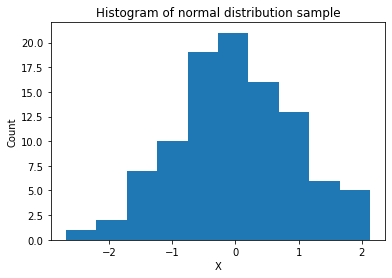

In [291]:
plt.hist(norm_sample)
plt.title('Histogram of normal distribution sample')
plt.xlabel('X')
plt.ylabel('Count')
plt.show()

#### CDF: Cumulative Distribution Function
Probability random variable <= a certain value. 


Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

CDF exists for all probability distributions (discrete/continuous):

For continuous variable:
    
- while PDF at given X = x is a probability *density*
- CDF F(x) is actually a *probability*

Mathematically, CDF is:

$$F(x) = P(X\leq x)$$

Why use the CDF?
- Continuous variables:
- Actually reports probability
- Simple arithmetic operations to calculate probability of given range.

Implicitly used in most hypothesis tests:
- Calculate probability of a measured value or values more extreme
- CDF yields whether measured value is likely under a given distribution.

####  Discrete case:

Back to our ad click bait example: 

- Use CDF to calculate probability of having <= 2 clicks in 50 random samples.
- Recall $p = 0.04$ for a click.

$$P(x \leq 2)$$

#### CDF in scipy.stats

- scipy.stats.binom.cdf()

- Generally, scipy.stats.distribution.cdf(arguments)


In [293]:
# Create the random discrete value for the number of success
x= 2
n = 50
p = 0.04

# Calculate the probability for x equal or less than 8
binom.cdf(k = x, n=n, p=p)

0.6767140040965929

Visualize pmf and cdf side by side

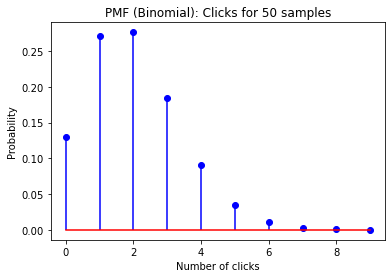

In [301]:
x,y = list(zip(*pmf_binomial))
plt.stem(x, y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('PMF (Binomial): Clicks for 50 samples')
plt.show()

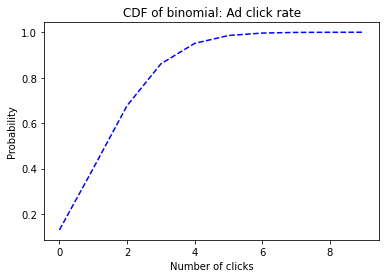

In [302]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('CDF of binomial: Ad click rate')
plt.show()

- What is the probability of getting less than 8 clicks?

In [303]:
binom.cdf(8, n = n, p = p)

0.9998520965199652

- Probability of getting less than infinity?
(this is all possible values)

In [304]:
binom.cdf(np.inf, n = n, p = p)

1.0

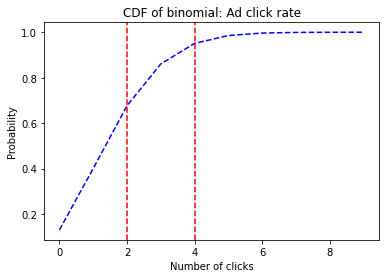

In [306]:
cdf_y = binom.cdf(k = x, n=n, p=p)
plt.plot(x, cdf_y, c = 'b', linestyle = '--')
plt.xlabel('Number of clicks')
plt.ylabel('Probability')
plt.title('CDF of binomial: Ad click rate')
plt.axvline(2, c = 'r', linestyle = '--')
plt.axvline(4, c = 'r', linestyle = '--')
plt.show()

What is probability of getting between 2 and 4?
- $ P(x <= 4) - P(x<=2)$

In [307]:
Pless4 = binom.cdf(k = 4, n=n, p=p)  
Pless2 = binom.cdf(k = 2, n=n, p=p)

Pless4 - Pless2

0.2743145240188942

What is the probability that we have greater than 4 clicks?
$$ P(x <= \infty) - P(x<=4)$$

$$ 1 - P(x<=4) $$

In python:

In [308]:
1 - binom.cdf(4, n, p)

0.048971471884512896

And if you are really that lazy:
- $P(X >x)$ as survival function: distribution.sf()

In [309]:
binom.sf(4, n , p)

0.04897147188451269

5\% chance of getting greater than 4 clicks in 50 randomized user-site interactions.

Generally:
$$ P(X > x) = 1 - P(X <= x) $$

<center>1 - distribution.cdf(x, parameters) </center>

#### Continuous Distribution
- CDF of the normal distribution

Example case: distribution of heights. 

We observe the mean is 5.5 ft with a standard deviation of 0.5 ft.

Model with normal distribution.

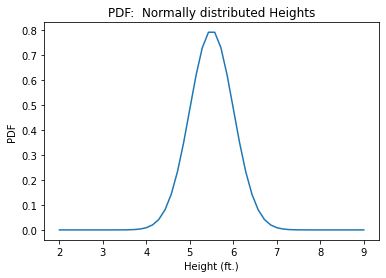

In [310]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()


Probability that height <= 4.7:

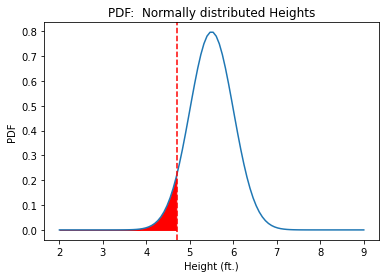

In [242]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm = norm.pdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm)
plt.fill_between(x,y_norm, where = (x <= 4.7), color='r')
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('PDF')
plt.title('PDF:  Normally distributed Heights')
plt.show()

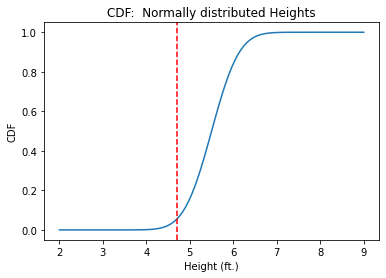

In [311]:
mu = 5.5 # mean
sigma = 0.5 # standard deviation

x = np.linspace(2,9, num = 100)
y_norm_cdf = norm.cdf(x, loc = mu, scale = sigma)
plt.plot(x, y_norm_cdf)
plt.axvline(x = 4.7, c = 'r', linestyle = '--')
plt.xlabel('Height (ft.)')
plt.ylabel('CDF')
plt.title('CDF:  Normally distributed Heights')
plt.show()

In [312]:
norm.cdf(4.7, loc = mu, scale = 0.5 )

0.05479929169955804

Probability that height is less than 4.5 ft and greater than 6.5 ft?
- Help me out. Use cdf and sf.

In [313]:
# mu is defined as mean already, set scale to 0.5 (std)

norm.cdf(4.5, loc = mu, scale =0.5) + norm.sf(6.5, loc = mu, scale =0.5)

0.04550026389635839